In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Miembros_2019-4.csv',low_memory=False)

In [3]:
print(list(df.columns.values))

['TRIMESTRE', 'PERIODO', 'DES_PERIODO', 'ORDEN_REGION', 'GRUPO_REGION', 'ESTRATO', 'DES_ESTRATO', 'UPM', 'ANO', 'MES', 'VIVIENDA', 'HOGAR', 'FACTOR_EXPANSION', 'ID_PROVINCIA', 'DES_PROVINCIA', 'ID_MUNICIPIO', 'DES_MUNICIPIO', 'ZONA', 'ID_HOGAR', 'MIEMBRO', 'ID_PERSONA', 'BARRIO_SECCION', 'PARAJE', 'ORDEN_CROQUIS', 'ROTACION_VIVIENDA', 'ROTACION_HOGAR', 'TIENE_ALUMBRADO_PUBLICO', 'CALLES_ASFALTADAS', 'CUANTAS_VIVIENDAS_EXISTEN', 'TOTAL_HOGARES_OCUPAN_VIVIENDA', 'ENCUESTADO_ANTERIORMENTE', 'TIPO_VIVIENDA', 'TIPO_VIVIENDA_ESP', 'NUMERO_DE_CASAS', 'NUMERO_DE_PISOS', 'NUMERO_APTOS_POR_PISO', 'MATERIAL_PARED_EXTERIOR', 'MATERIAL_PARED_EXTERIOR_ESP', 'MATERIAL_PARED_INTERIOR', 'MATERIAL_PARED_INTERIOR_ESP', 'MATERIAL_TECHO', 'MATERIAL_TECHO_ESP', 'MATERIAL_PISO', 'MATERIAL_PISO_ESP', 'TENENCIA_VIVIENDA', 'TENENCIA_VIVIENDA_ESP', 'TIEMPO_PAGANDO_ALQUILER_VIV', 'MONTO_ALQUILER_PESOS_VIV', 'MONTO_ALQUILER_DOLARES_VIV', 'PERIODO_PAGO_ALQUILER_VIV', 'MONTO_ALQUILARIA_VIVIENDA_MES', 'CANT_CUARTOS_V

In [4]:
lst_vars = ['MES','SEXO','SUELDO_BRUTO_AP_MONTO']

In [5]:
df2 = df[lst_vars]

In [6]:
df2

,MES,SEXO,SUELDO_BRUTO_AP_MONTO
0,10,2,4500.0
1,10,2,NaN
2,10,1,NaN
3,10,2,7500.0
4,10,2,NaN
...,...,...,...
20960,12,1,NaN
20961,12,1,4000.0
20962,12,2,2500.0
20963,12,2,NaN


In [7]:
df3 = df2.dropna()

In [8]:
salario_mujer = []
salario_hombre = []
meses = [10,11,12]

for sexo in [1,2]:
    df_sexo = df3[df3['SEXO']==sexo]
    
    for mes in meses:
        df_mes = df_sexo[df_sexo['MES']==mes]
        salario_medio = df_mes['SUELDO_BRUTO_AP_MONTO'].mean()
        
        if sexo==1:
            salario_mujer.append(salario_medio)
        else:
            salario_hombre.append(salario_medio)
        
        print('Género: {}, mes: {}, salario medio: {} DOP'.format(sexo,mes,salario_medio))

Género: 1, mes: 10, salario medio: 10978.49107142857 DOP
Género: 1, mes: 11, salario medio: 12071.362264573992 DOP
Género: 1, mes: 12, salario medio: 11733.467650397275 DOP
Género: 2, mes: 10, salario medio: 12036.765196662695 DOP
Género: 2, mes: 11, salario medio: 11940.867039106146 DOP
Género: 2, mes: 12, salario medio: 12131.53237410072 DOP


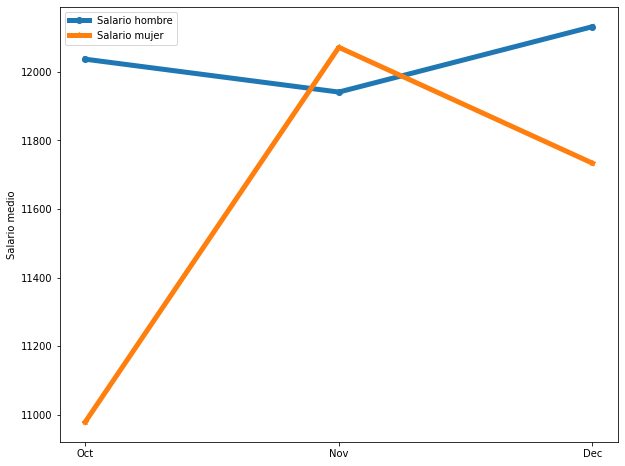

In [59]:
plt.figure(figsize=(10,8))
plt.plot(meses,salario_hombre,'o-',label='Salario hombre',lw=5)
plt.plot(meses,salario_mujer,'*-',label='Salario mujer',lw=5)
plt.legend()
plt.ylabel('Salario medio')
plt.xticks(meses,['Oct','Nov','Dec'])
plt.show()

## No hay mucha diferencia entre los salarios medios.

In [45]:
df_sec1 = df[(df['SEXO']==1) & (df['MES']==10)]
df_sec2 = df[(df['SEXO']==2) & (df['MES']==10)]

<AxesSubplot:>

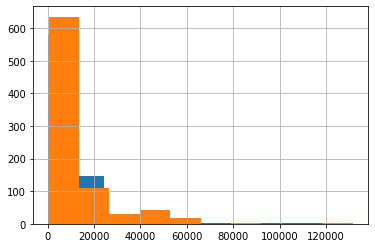

In [46]:
df_sec1['SUELDO_BRUTO_AP_MONTO'].hist()
df_sec2['SUELDO_BRUTO_AP_MONTO'].hist()


#### In a normal distribution, the interval [μ - 2σ, μ + 2σ] covers 95.5 %, so you can use 2 * std to estimate the 95 % interval:

In [37]:
salario_mujer = []
salario_hombre = []

std_mujer = []
std_hombre = []

meses = [10,11,12]

for sexo in [1,2]:
    df_sexo = df3[df3['SEXO']==sexo]
    
    for mes in meses:
        df_mes = df_sexo[df_sexo['MES']==mes]
        salario_medio = df_mes['SUELDO_BRUTO_AP_MONTO'].mean()
        std_result = df_mes['SUELDO_BRUTO_AP_MONTO'].std()
        
        if sexo==1:
            salario_mujer.append(salario_medio)
            std_mujer.append(2*std_result)
            
        else:
            salario_hombre.append(salario_medio)
            std_hombre.append(2*std_result)
        
        print('Género: {}, mes: {}, salario medio: {} DOP, 2 x desviación standard = {}'.format(sexo,mes,salario_medio,std_result))

Género: 1, mes: 10, salario medio: 10978.49107142857 DOP, 2 x desviación standard = 11907.174261615219
Género: 1, mes: 11, salario medio: 12071.362264573992 DOP, 2 x desviación standard = 16129.069639442363
Género: 1, mes: 12, salario medio: 11733.467650397275 DOP, 2 x desviación standard = 12766.448714186874
Género: 2, mes: 10, salario medio: 12036.765196662695 DOP, 2 x desviación standard = 13761.655141543755
Género: 2, mes: 11, salario medio: 11940.867039106146 DOP, 2 x desviación standard = 14343.414642843238
Género: 2, mes: 12, salario medio: 12131.53237410072 DOP, 2 x desviación standard = 14313.720631494723


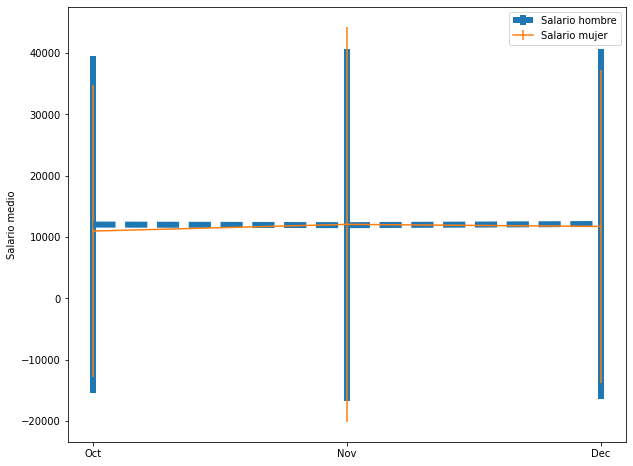

In [61]:
plt.figure(figsize=(10,8))
plt.errorbar(meses,salario_hombre,yerr=std_hombre,label='Salario hombre', linestyle='--',lw=6)
plt.errorbar(meses,salario_mujer,yerr=std_mujer,label='Salario mujer')
plt.legend()
plt.ylabel('Salario medio')
plt.xticks(meses,['Oct','Nov','Dec'])
plt.show()